In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,512 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155047 files and d

In [1]:
import pandas as pd

In [2]:
base_path = '/content/drive/MyDrive/Colab Notebooks/predict_SAL/' 

In [3]:
salary_old = pd.read_csv(base_path + 'data/SAL.csv', encoding='cp949')
salary_old = salary_old.dropna()
salary_new = pd.read_csv(base_path + 'data/SAL_21.csv', encoding='cp949')
salary_new = salary_new.dropna()

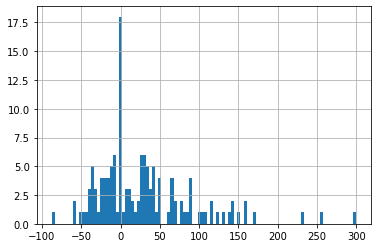

In [4]:
salary_old['PER'].hist(bins=100)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


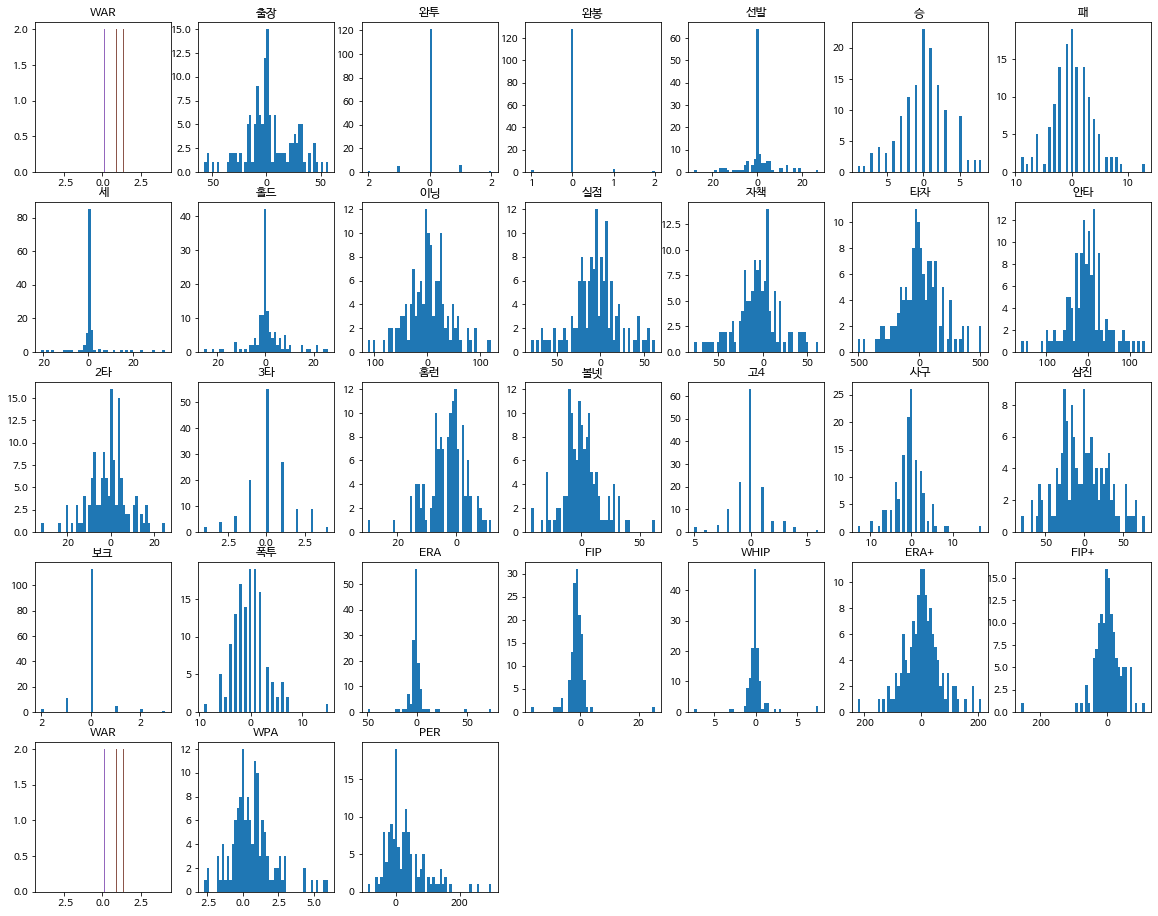

In [5]:
import matplotlib.pyplot as plt
feature_df = salary_old[["WAR","출장","완투","완봉","선발","승","패","세","홀드","이닝","실점","자책","타자","안타","2타","3타",
              "홈런","볼넷","고4","사구","삼진","보크","폭투","ERA","FIP","WHIP","ERA+","FIP+","WAR","WPA","PER"]]
plt.rc('font', family='NanumBarunGothic') 
def plot_each(df):
  plt.rcParams['figure.figsize'] = [20, 16]
  fig = plt.figure(1)
  for i in range(len(df.columns)):
    ax = fig.add_subplot(5, 7, i+1)
    plt.hist(df[df.columns[i]], bins = 50)
    ax.set_title(df.columns[i])
  plt.show()
plot_each(feature_df)

In [6]:
pd.options.mode.chained_assignment = None     #스케일링

def standard_scaling(df, scale_columns):
  for col in scale_columns:
    series_mean = df[col].mean()
    series_std = df[col].std()
    df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
  return df

scale_columns = ["WAR","출장","완투","완봉","선발","승","패","세","홀드","이닝","실점","자책","타자","안타","2타","3타",
              "홈런","볼넷","고4","사구","삼진","보크","폭투","ERA","FIP","WHIP","ERA+","FIP+","WAR","WPA"]

salary_old_df = standard_scaling(salary_old, scale_columns)
salary_old_df = salary_old_df.rename(columns={"PER":"y"})
salary_old_df

salary_new_df = standard_scaling(salary_new, scale_columns)
salary_new_df = salary_new_df.rename(columns={"PER":"y"})
salary_new_df

,이름,y,WAR,출장,완투,완봉,선발,승,패,세,홀드,이닝,실점,자책,타자,안타,2타,3타,홈런,볼넷,고4,사구,삼진,보크,폭투,ERA,FIP,WHIP,ERA+,FIP+,WAR_1,WPA
5,고우석,-18.20,-2.858923,-1.300595,0.132976,0.000000,-0.123098,-2.238040,0.565562,-3.017949,-0.146827,-0.879893,0.203944,0.141917,-0.758723,-0.393594,0.092958,-0.527675,-0.677047,-0.821480,-1.947963,-0.553141,-1.045536,-0.062755,0.762288,0.609217,-0.118591,0.421563,-2.207526,0.428218,-3.38,-2.273824
8,정우람,0.00,-2.242959,-0.515578,0.132976,0.000000,-0.123098,-0.338308,0.565562,-1.644229,-0.146827,-0.234871,0.617498,0.757357,-0.191485,-0.128890,0.231446,0.756335,-0.254616,-0.422832,-1.947963,1.177401,-0.082253,-1.589796,-0.072417,0.773448,0.021245,0.094841,-2.402930,0.156989,-2.60,-0.926772
15,이영하,-29.60,-0.995236,0.356663,-3.102780,0.000000,-1.229089,-3.323601,2.271598,1.103210,-0.146827,-0.912394,0.157994,-0.114517,-0.654536,-0.152954,-0.460995,-2.453691,0.590246,0.089715,1.226173,-1.418413,-0.403347,-1.589796,-0.350653,0.227621,0.396260,0.561587,-0.145726,-0.411610,-1.02,-3.525183
21,배제성,50.00,0.070856,-0.297518,-3.102780,-4.242641,0.568146,-0.066918,-1.140473,0.072920,-0.146827,0.112641,0.203944,0.141917,0.167380,-0.201082,1.477840,-1.169681,1.012676,0.943961,-0.043481,0.312130,-0.499676,1.464286,0.205818,0.031993,0.714070,0.079283,0.189047,-0.695910,0.33,0.898740
22,박준표,45.45,0.181414,-0.166682,0.132976,0.000000,-0.123098,0.475862,-0.458059,1.103210,-0.849672,-0.254872,-0.163659,-0.422237,-0.179908,-0.177018,-0.460995,-0.527675,-0.465831,-0.081134,0.591346,-1.129989,0.206732,-0.062755,0.205818,-0.139484,-0.557168,0.172632,1.554001,1.385686,0.47,-0.205400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,양승철,6.60,0.189311,-0.035846,0.132976,0.000000,-0.123098,-0.338308,-0.458059,0.072920,-0.146827,0.167643,-0.025808,-0.063230,0.190533,0.280196,-0.322507,-0.527675,-0.043400,0.317514,-0.043481,0.888977,-0.178581,-0.062755,0.205818,-1.045170,-0.004179,-0.060741,0.418934,-0.019473,0.48,0.295143
185,구승민,87.50,1.966132,0.487499,0.132976,0.000000,-0.123098,1.018643,-0.799266,-0.270510,2.313130,0.467653,-0.393411,-0.268377,0.184745,-0.273274,0.369934,0.114330,0.379030,0.089715,-2.582790,-0.841565,0.238842,-0.062755,-1.741828,-0.658744,0.084807,-1.118698,1.023824,0.032812,2.73,2.400371
188,박주홍,-5.50,0.181414,-0.995310,0.132976,0.000000,-0.261347,-0.066918,0.224355,0.072920,-0.322538,-0.482380,-0.806964,-0.781244,-0.561926,-0.658297,-0.599483,-1.169681,-0.888262,-0.650631,-0.043481,-0.553141,-0.499676,-1.589796,0.205818,0.085126,-0.150372,-0.107415,0.102839,0.088365,0.47,0.486528
189,홍건희,107.50,1.342270,1.490576,0.132976,0.000000,-2.058581,0.204472,-1.822887,0.244635,1.258862,-0.459879,-1.634072,-1.601831,-0.625595,-1.067384,-1.014948,1.398340,-1.099477,-0.821480,-0.043481,0.600554,0.014075,-0.062755,-1.185358,-0.540401,-0.608017,-0.558603,0.533877,0.536055,1.94,0.906101


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[Text(0, 0, 'const'),
 Text(0, 0, '2타'),
 Text(0, 0, '3타'),
 Text(0, 0, 'ERA'),
 Text(0, 0, 'ERA+'),
 Text(0, 0, 'FIP'),
 Text(0, 0, 'FIP+'),
 Text(0, 0, 'WAR'),
 Text(0, 0, 'WAR_1'),
 Text(0, 0, 'WHIP'),
 Text(0, 0, 'WPA'),
 Text(0, 0, '고4'),
 Text(0, 0, '보크'),
 Text(0, 0, '볼넷'),
 Text(0, 0, '사구'),
 Text(0, 0, '삼진'),
 Text(0, 0, '선발'),
 Text(0, 0, '세'),
 Text(0, 0, '승'),
 Text(0, 0, '실점'),
 Text(0, 0, '안타'),
 Text(0, 0, '완봉'),
 Text(0, 0, '완투'),
 Text(0, 0, '이닝'),
 Text(0, 0, '자책'),
 Text(0, 0, '출장'),
 Text(0, 0, '타자'),
 Text(0, 0, '패'),
 Text(0, 0, '폭투'),
 Text(0, 0, '홀드'),
 Text(0, 0, '홈런')]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


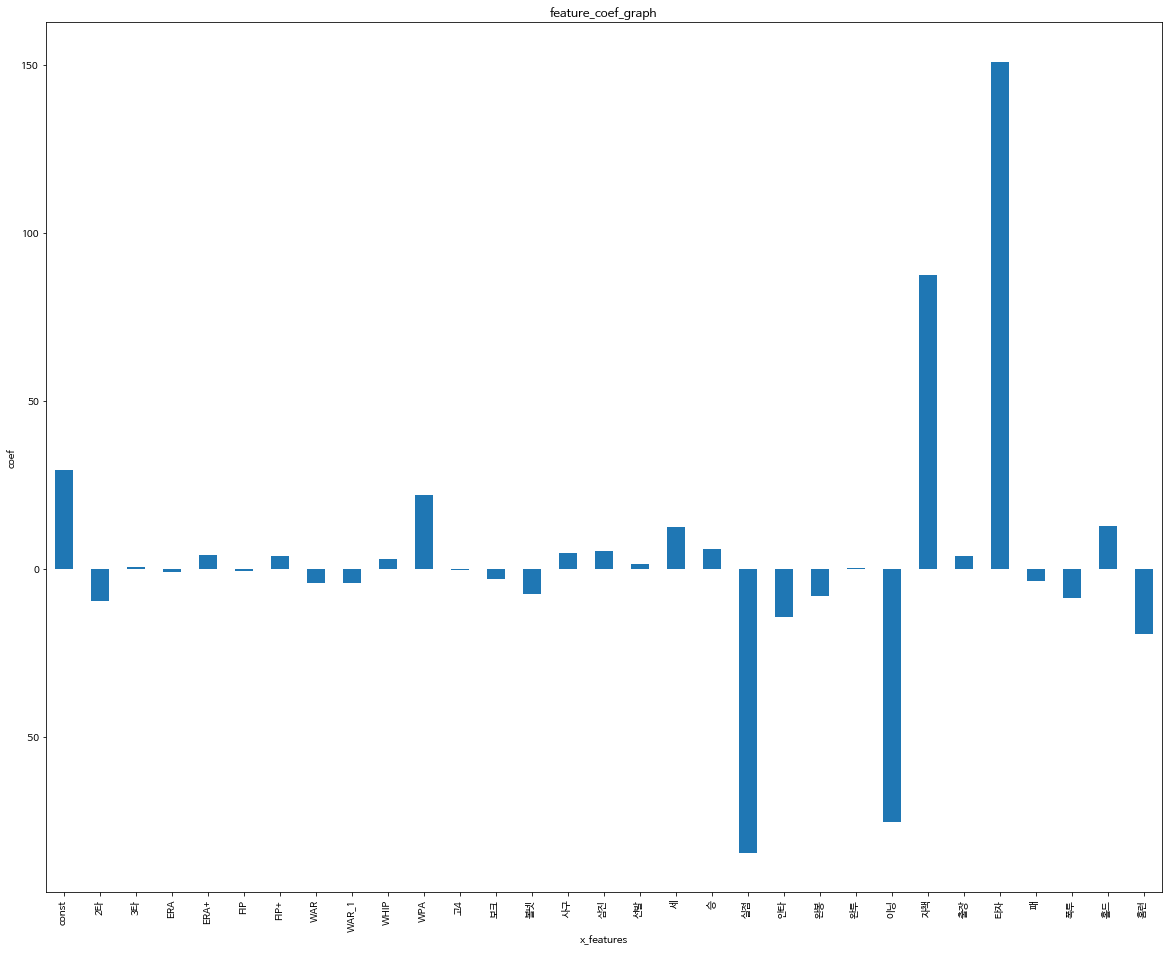

In [7]:
import statsmodels.api as sm     #영향력이 강한 피처찾기

x_train = sm.add_constant(salary_old_df[salary_old_df.columns.difference(['이름', 'y'])])
y_train = salary_old_df['y']
model = sm.OLS(y_train, x_train).fit()
model.summary()

plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['figure.figsize'] = [20, 16]

coefs = model.params.tolist()
coefs_series = pd.Series(coefs)

x_labels = model.params.index.tolist()

ax = coefs_series.plot(kind='bar')
ax.set_title('feature_coef_graph')
ax.set_xlabel('x_features')
ax.set_ylabel('coef')
ax.set_xticklabels(x_labels)

0.7097604514566314
33.58018781822432
